In [1]:
from argparse import ArgumentParser

from keras.utils import to_categorical
from utility import globalvars
from ggplot import *

import pandas as pd
import numpy as np

try:
    import cPickle as pickle
except ImportError:
    import pickle
    
    
%matplotlib inline

Using TensorFlow backend.
/home/mike/anaconda3/envs/tfm-project/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/mike/anaconda3/envs/tfm-project/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


In [2]:
dataset = "berlin-012345"
dataset_path = dataset + "/"
print("Loading data from " + dataset + " data set...")
ds = pickle.load(open(dataset_path + dataset + '_db.p', 'rb'))
nb_samples = len(ds.targets)
print("Number of samples: " + str(nb_samples))
globalvars.nb_classes = len(np.unique(ds.targets))
nb_classes = globalvars.nb_classes
print("Number of classes: " + str(globalvars.nb_classes))
i = 0
for name_emo in ds.name_emotions:
    print(str(i) + " -> " + name_emo)
    i += 1

Loading data from berlin-012345 data set...
Number of samples: 375
Number of classes: 5
0 -> anger
1 -> disgust
2 -> fear
3 -> happiness
4 -> sadness
5 -> surprise


In [3]:
print("Loading features from file...")
features = pickle.load(open(dataset_path + dataset + '_features.p', 'rb'))
features_sequence = pickle.load(open(dataset_path + dataset + '_features_sequence.p', 'rb'))

lable_features = ['zcr', 'energy', 'energy_entropy', 'spectral_centroid', 'spectral_spread', 'spectral_entropy',
                  'spectral_flux', 'spectral_rolloff', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6',
                  'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13', 'chroma_1', 'chroma_2',
                  'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10',
                  'chroma_11', 'chroma_12', 'chroma_std', 'harmonic_ratio', 'pitch']

Loading features from file...


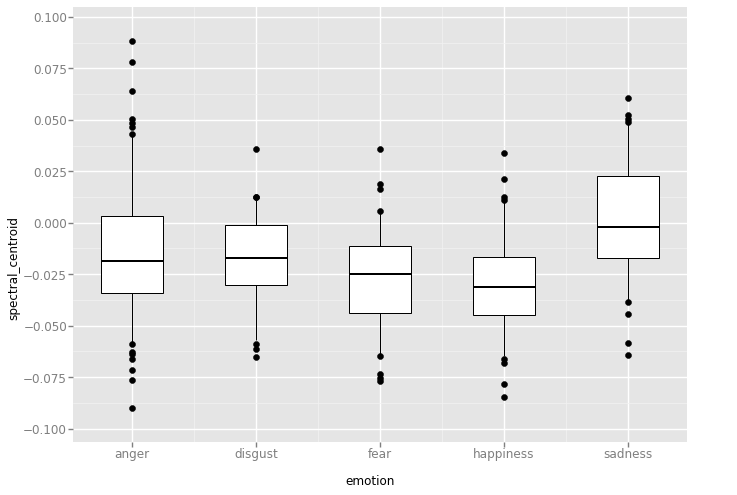

In [4]:
    df_emotions = pd.DataFrame(data=ds.targets, columns=["emotion"])
    mean_features = []
    for single_audio in features:
        mean_features.append(np.apply_along_axis(np.mean, 0, single_audio))
    df_features = pd.DataFrame.from_records(data=mean_features, columns=lable_features)
    df = pd.concat([df_features, df_emotions], axis=1)

    emotion_dic = {0: 'anger', 1: 'disgust', 2: 'fear', 3: 'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral',
                   7: 'calm', 8: 'boredom'}
    df["emotion"] = df["emotion"].map(lambda i: emotion_dic[i])

    p = ggplot(df, aes(x="emotion", y="spectral_centroid"))
    p + geom_boxplot()
    p.show()

In [5]:
df.head()

,zcr,energy,energy_entropy,spectral_centroid,spectral_spread,spectral_entropy,spectral_flux,spectral_rolloff,mfcc_1,mfcc_2,...,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,chroma_12,chroma_std,harmonic_ratio,pitch,emotion
0,-0.011972,-0.028726,0.270556,-0.000980,-0.005330,0.061553,-0.027314,-0.002690,-3.346313,0.158949,...,-0.012639,-0.029328,-0.029232,-0.029020,-0.027960,-0.029184,-0.023709,0.033864,3.553759,disgust
1,-0.036957,-0.052878,0.237085,-0.027904,-0.030193,0.053308,-0.051612,-0.027348,-2.906817,0.107961,...,-0.040708,-0.053668,-0.053437,-0.053174,-0.052649,-0.053600,-0.049401,0.005133,4.022826,disgust
2,-0.057542,-0.067209,0.176026,-0.047185,-0.050094,0.012757,-0.066964,-0.047843,-2.602657,0.030770,...,-0.061333,-0.068068,-0.067767,-0.067598,-0.067739,-0.067990,-0.065120,0.014649,4.466872,disgust
3,-0.075076,-0.082851,0.151387,-0.066151,-0.066189,-0.027250,-0.082934,-0.068978,-2.387837,0.080836,...,-0.074653,-0.084534,-0.084243,-0.083577,-0.083300,-0.084477,-0.080772,0.007447,4.668959,happiness
4,-0.049432,-0.063573,0.188322,-0.039562,-0.044845,0.043121,-0.063843,-0.037595,-2.700888,0.048878,...,-0.056277,-0.064813,-0.064685,-0.063422,-0.064353,-0.064879,-0.061686,0.057863,4.261745,fear


In [6]:
#df['zcr']
pd.unique(df["emotion"])
df.loc[2:4]



,zcr,energy,energy_entropy,spectral_centroid,spectral_spread,spectral_entropy,spectral_flux,spectral_rolloff,mfcc_1,mfcc_2,...,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,chroma_12,chroma_std,harmonic_ratio,pitch,emotion
2,-0.057542,-0.067209,0.176026,-0.047185,-0.050094,0.012757,-0.066964,-0.047843,-2.602657,0.030770,...,-0.061333,-0.068068,-0.067767,-0.067598,-0.067739,-0.067990,-0.065120,0.014649,4.466872,disgust
3,-0.075076,-0.082851,0.151387,-0.066151,-0.066189,-0.027250,-0.082934,-0.068978,-2.387837,0.080836,...,-0.074653,-0.084534,-0.084243,-0.083577,-0.083300,-0.084477,-0.080772,0.007447,4.668959,happiness
4,-0.049432,-0.063573,0.188322,-0.039562,-0.044845,0.043121,-0.063843,-0.037595,-2.700888,0.048878,...,-0.056277,-0.064813,-0.064685,-0.063422,-0.064353,-0.064879,-0.061686,0.057863,4.261745,fear


In [7]:
df[2:4]

,zcr,energy,energy_entropy,spectral_centroid,spectral_spread,spectral_entropy,spectral_flux,spectral_rolloff,mfcc_1,mfcc_2,...,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,chroma_12,chroma_std,harmonic_ratio,pitch,emotion
2,-0.057542,-0.067209,0.176026,-0.047185,-0.050094,0.012757,-0.066964,-0.047843,-2.602657,0.030770,...,-0.061333,-0.068068,-0.067767,-0.067598,-0.067739,-0.067990,-0.065120,0.014649,4.466872,disgust
3,-0.075076,-0.082851,0.151387,-0.066151,-0.066189,-0.027250,-0.082934,-0.068978,-2.387837,0.080836,...,-0.074653,-0.084534,-0.084243,-0.083577,-0.083300,-0.084477,-0.080772,0.007447,4.668959,happiness


In [8]:
df.describe()
df.index

RangeIndex(start=0, stop=375, step=1)

In [9]:
features_sequence.itemsize

4

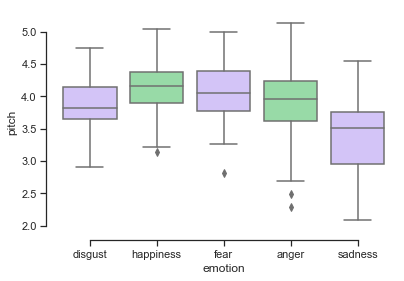

In [10]:
import seaborn as sns

sns.set(style="ticks", palette="pastel")



sns.boxplot(x="emotion", y="pitch", palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

In [ ]:
/home/mike/TFM/programacion/datasets/RAVDESS/buena_remesa/fina